In [70]:
import pandas as pd

names = ['date', 'handle_time', 'handle_time_forecast',
    'volume', 'volume_forecast']

h = pd.read_csv('../data/holidays.csv', parse_dates=['ACTIVITY DATE'])
df = pd.read_csv('../data/full_dataset.csv', parse_dates=['ACTIVITY DATE'])
df = df.drop('Unnamed: 8', 1)
df = df.rename(columns={'ACTIVITY DATE':'date','Sum of TOTAL TIME - AHT (sec)': 'handle_time', 
                   'Sum of TOTAL TIME - AHT - FORECAST (sec)':  'handle_time_forecast',
                  'Sum of VOLUME - RECEIVED':'volume', 'Sum of VOLUME - FORECAST': 'volume_forecast'})

df['aht'] = df['handle_time']/df['volume']
df.head()

,date,DIVISION,BUSINESS UNIT,BUSINESS LINE,handle_time,handle_time_forecast,volume,volume_forecast,aht
0,2016-01-01,WISE,WISE,WISE Contractual,0.0,NaN,0.0,0.0,NaN
1,2016-01-01,College Savings,College Savings,CS Alaska,0.0,NaN,0.0,0.0,NaN
2,2016-01-01,College Savings,College Savings,CS John Hancock,0.0,NaN,0.0,0.0,NaN
3,2016-01-01,College Savings,College Savings,CS Maryland,0.0,NaN,0.0,0.0,NaN
4,2016-01-01,College Savings,College Savings,CS National,0.0,NaN,0.0,0.0,NaN


In [71]:
df.describe()

,handle_time,handle_time_forecast,volume,volume_forecast,aht
count,1.378200e+04,1.525000e+03,16672.000000,16591.000000,11838.000000
mean,6.022210e+05,6.861608e+05,886.230266,914.683684,529.224615
std,1.029848e+06,1.161274e+06,1669.346384,1726.872549,96.059995
min,0.000000e+00,0.000000e+00,-1.000000,0.000000,-0.000000
25%,5.202375e+04,9.459700e+04,0.000000,0.000000,468.495982
50%,1.780305e+05,1.906860e+05,269.000000,275.000000,532.649132
75%,5.160570e+05,5.746290e+05,653.250000,658.500000,590.774665
max,6.893852e+06,6.651624e+06,13410.000000,10830.000000,3957.030201


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17553 entries, 0 to 17552
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   date                  17553 non-null  datetime64[ns]
 1   DIVISION              17553 non-null  object        
 2   BUSINESS UNIT         17553 non-null  object        
 3   BUSINESS LINE         17553 non-null  object        
 4   handle_time           13782 non-null  float64       
 5   handle_time_forecast  1525 non-null   float64       
 6   volume                16672 non-null  float64       
 7   volume_forecast       16591 non-null  float64       
 8   aht                   11838 non-null  float64       
dtypes: datetime64[ns](1), float64(5), object(3)
memory usage: 1.2+ MB


In [73]:
df['date'].min()

Timestamp('2016-01-01 00:00:00')

In [74]:
df['date'].max()

Timestamp('2020-12-31 00:00:00')

In [86]:
df.groupby('date').count()

,DIVISION,BUSINESS UNIT,BUSINESS LINE,handle_time,handle_time_forecast,volume,volume_forecast,aht,month,year
date,,,,,,,,,,
2016-01-01,9,9,9,9,0,9,9,2,9,9
2016-01-02,9,9,9,9,0,9,9,1,9,9
2016-01-03,9,9,9,9,0,9,9,0,9,9
2016-01-04,9,9,9,9,0,9,9,9,9,9
2016-01-05,9,9,9,9,0,9,9,9,9,9
...,...,...,...,...,...,...,...,...,...,...
2020-12-27,10,10,10,0,0,10,9,0,10,10
2020-12-28,10,10,10,10,10,10,10,10,10,10
2020-12-29,10,10,10,10,10,10,10,10,10,10


# How many days are weekends and Holidays from 2016 to 2020?
557

In [75]:
df[~(df['date'].dt.weekday.isin([5,6])) & ~(df['date'].isin(h.iloc[:,0].tolist()))].groupby('date').count()

,DIVISION,BUSINESS UNIT,BUSINESS LINE,handle_time,handle_time_forecast,volume,volume_forecast,aht
date,,,,,,,,
2016-01-01,9,9,9,9,0,9,9,2
2016-01-04,9,9,9,9,0,9,9,9
2016-01-05,9,9,9,9,0,9,9,9
2016-01-06,9,9,9,9,0,9,9,9
2016-01-07,9,9,9,9,0,9,9,9
...,...,...,...,...,...,...,...,...
2020-12-24,10,10,10,10,10,10,10,10
2020-12-28,10,10,10,10,10,10,10,10
2020-12-29,10,10,10,10,10,10,10,10


# There are approximately 1269 days that are not holidays or weekends

In [82]:
df[~(df['date'].dt.weekday.isin([5,6])) & ~(df['date'].isin(h.iloc[:,0].tolist())) & (df['date'].dt.year==2020)].groupby('date').count().info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2020-01-02 to 2020-12-31
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   DIVISION              253 non-null    int64
 1   BUSINESS UNIT         253 non-null    int64
 2   BUSINESS LINE         253 non-null    int64
 3   handle_time           253 non-null    int64
 4   handle_time_forecast  253 non-null    int64
 5   volume                253 non-null    int64
 6   volume_forecast       253 non-null    int64
 7   aht                   253 non-null    int64
 8   month                 253 non-null    int64
 9   year                  253 non-null    int64
dtypes: int64(10)
memory usage: 21.7 KB


# There are approximately 253 business days in 2020

In [76]:
df['month'] = df['date'].dt.month_name()
df['year'] = df['date'].dt.year

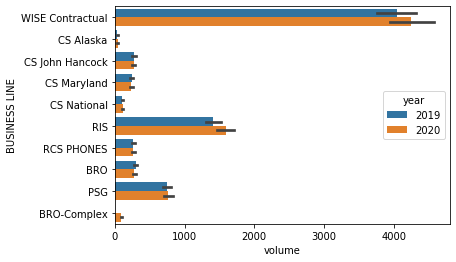

In [77]:
import seaborn as sns

sns.barplot(x='volume', y='BUSINESS LINE', hue='year', data=df[df['year'].isin([2019,2020])])

# Business units WISE, RIS, PSG show slight increase in volume from 2019 to 2020

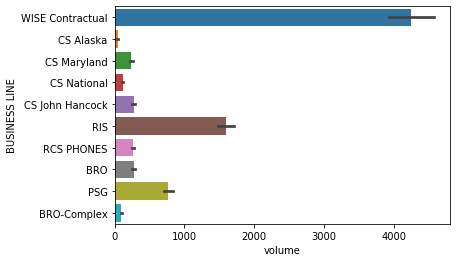

In [78]:
import seaborn as sns

sns.barplot(x='volume', y='BUSINESS LINE', data=df[df['year']==2020])

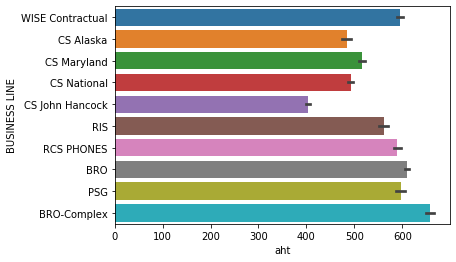

In [81]:
sns.barplot(x='aht', y='BUSINESS LINE', data=df[df['year']==2020])

# What date had the highest aht?

In [89]:
df[df['aht']==df['aht'].max()]

,date,DIVISION,BUSINESS UNIT,BUSINESS LINE,handle_time,handle_time_forecast,volume,volume_forecast,aht,month,year
6623,2018-01-06,II Services and Operations,SCS,PSG,1179195.0,NaN,298.0,177.0,3957.030201,January,2018


In [91]:
df.index = df['date']

In [103]:
df = df[(df['aht'] > 200) & (df['aht'] < 1500)]

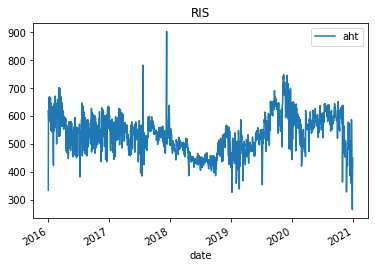

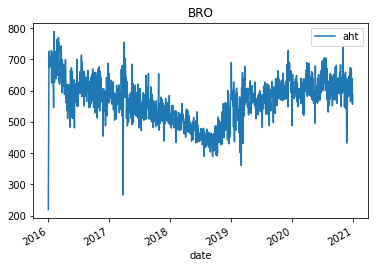

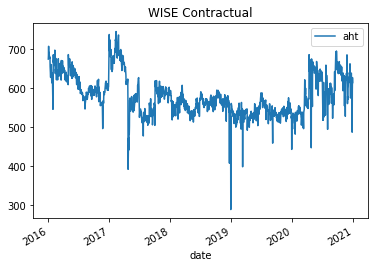

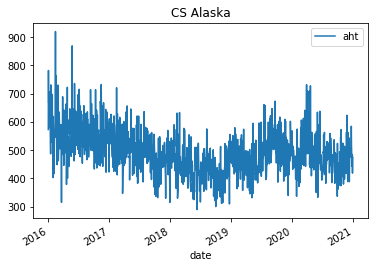

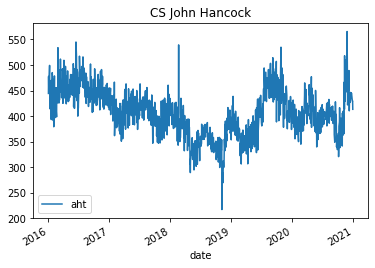

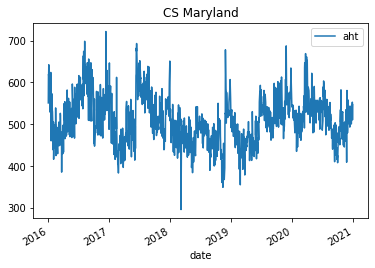

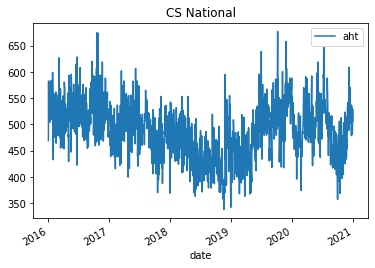

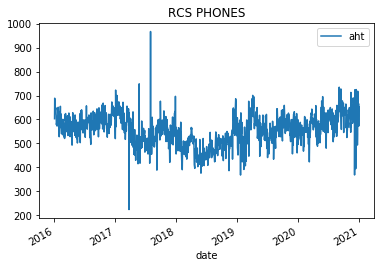

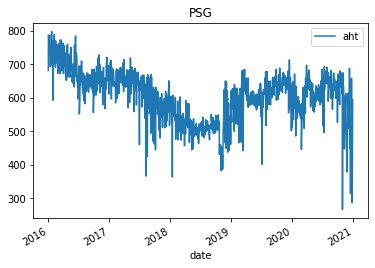

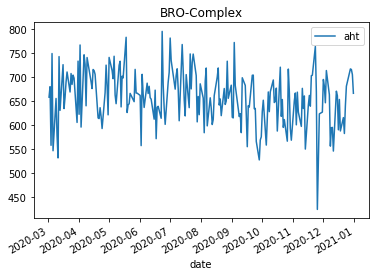

In [104]:
import matplotlib.pyplot as plt
for bl in df['BUSINESS LINE'].unique():
    _ = df[df['BUSINESS LINE']==bl].plot(x='date', y='aht')
    plt.title(bl)
    plt.show()

In [95]:
df[df['date']=='2018-01-06']

,date,DIVISION,BUSINESS UNIT,BUSINESS LINE,handle_time,handle_time_forecast,volume,volume_forecast,aht,month,year
date,,,,,,,,,,,
2018-01-06,2018-01-06,WISE,WISE,WISE Contractual,NaN,NaN,0.0,0.0,NaN,January,2018
2018-01-06,2018-01-06,College Savings,College Savings,CS Alaska,NaN,NaN,0.0,0.0,NaN,January,2018
2018-01-06,2018-01-06,College Savings,College Savings,CS John Hancock,NaN,NaN,0.0,0.0,NaN,January,2018
2018-01-06,2018-01-06,College Savings,College Savings,CS Maryland,NaN,NaN,0.0,0.0,NaN,January,2018
2018-01-06,2018-01-06,College Savings,College Savings,CS National,NaN,NaN,0.0,0.0,NaN,January,2018
2018-01-06,2018-01-06,II Services and Operations,RIS,RIS,NaN,NaN,0.0,0.0,NaN,January,2018
2018-01-06,2018-01-06,II Services and Operations,RCS PHONES,RCS PHONES,NaN,NaN,0.0,0.0,NaN,January,2018
2018-01-06,2018-01-06,II Services and Operations,SCS,BRO,NaN,NaN,0.0,0.0,NaN,January,2018
2018-01-06,2018-01-06,II Services and Operations,SCS,PSG,1179195.0,NaN,298.0,177.0,3957.030201,January,2018


# What was the total call volume in 2020?

In [105]:
df.groupby(['year']).sum()['volume']

year
2016    3067929.0
2017    3135103.0
2018    3006906.0
2019    2689468.0
2020    2871338.0
Name: volume, dtype: float64

# Which business unit in 2020 had the highest handle time in a single day?

On April 24th, 2020, WISE had around 1729 hours of handle time in a single day!

In [135]:
df_2020 = df[df['year']==2020]

In [140]:
max_handletime_2020 = df_2020[df_2020['handle_time']==df_2020['handle_time'].max()]
max_handletime_2020 

,date,DIVISION,BUSINESS UNIT,BUSINESS LINE,handle_time,handle_time_forecast,volume,volume_forecast,aht,month,year
date,,,,,,,,,,,
2020-04-24,2020-04-24,WISE,WISE,WISE Contractual,6223511.0,NaN,12770.0,5826.0,487.354033,April,2020


In [138]:
max_handletime_2020['handle_time']/3600

date
2020-04-24    1728.753056
Name: handle_time, dtype: float64

In [147]:
df_2020 = df_2020.drop('date', 1).reset_index()

# Which day in 2020 had the highest total handle_time?

On January 2nd, 2020 2,872 hours of handle time was recorded

In [152]:
g = df_2020.groupby('date').sum()
g

,handle_time,handle_time_forecast,volume,volume_forecast,aht,year
date,,,,,,
2020-01-01,284882.0,0.0,642.0,369.0,443.741433,2020
2020-01-02,10340893.0,0.0,20878.0,17686.0,4491.707683,18180
2020-01-03,8288847.0,0.0,15066.0,15179.0,4960.666619,18180
2020-01-04,379299.0,0.0,646.0,1127.0,1177.310837,4040
2020-01-06,9436881.0,0.0,18254.0,18804.0,4713.648886,18180
...,...,...,...,...,...,...
2020-12-24,3454285.0,4561577.0,5654.0,6943.0,5881.829338,20200
2020-12-28,9119886.0,12002581.0,21067.0,17329.0,4950.190126,20200
2020-12-29,8311336.0,10931155.0,17995.0,16049.0,5129.678138,20200


In [155]:
max_handle_time = g[g['handle_time']==g['handle_time'].max()]
max_handle_time 

,handle_time,handle_time_forecast,volume,volume_forecast,aht,year
date,,,,,,
2020-01-02,10340893.0,0.0,20878.0,17686.0,4491.707683,18180


In [156]:
max_handle_time['handle_time']/3600

date
2020-01-02    2872.470278
Name: handle_time, dtype: float64

# Which day in 2020 had the highest total call volume?

On December 28, 2020 21,067 calls were recieved.

In [157]:
max_volume = g[g['volume']==g['volume'].max()]
max_volume 

,handle_time,handle_time_forecast,volume,volume_forecast,aht,year
date,,,,,,
2020-12-28,9119886.0,12002581.0,21067.0,17329.0,4950.190126,20200


# What was the total talk time recieved on 2020-12-28

approximately 2,533 hours of handle time was recieved

In [162]:
9119886/3600

2533.3016666666667